In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from numpy import linalg as LA
from scipy.fftpack import ifftn, fftshift
import os
from numpy.fft import fft2, fftshift, ifft2
from scipy.signal import fftconvolve, windows
import matplotlib 
from scipy.signal.windows import kaiser

FONTSIZE=10


# Fig6: Numerical Structure Factor, w/ Corrected Physical Units

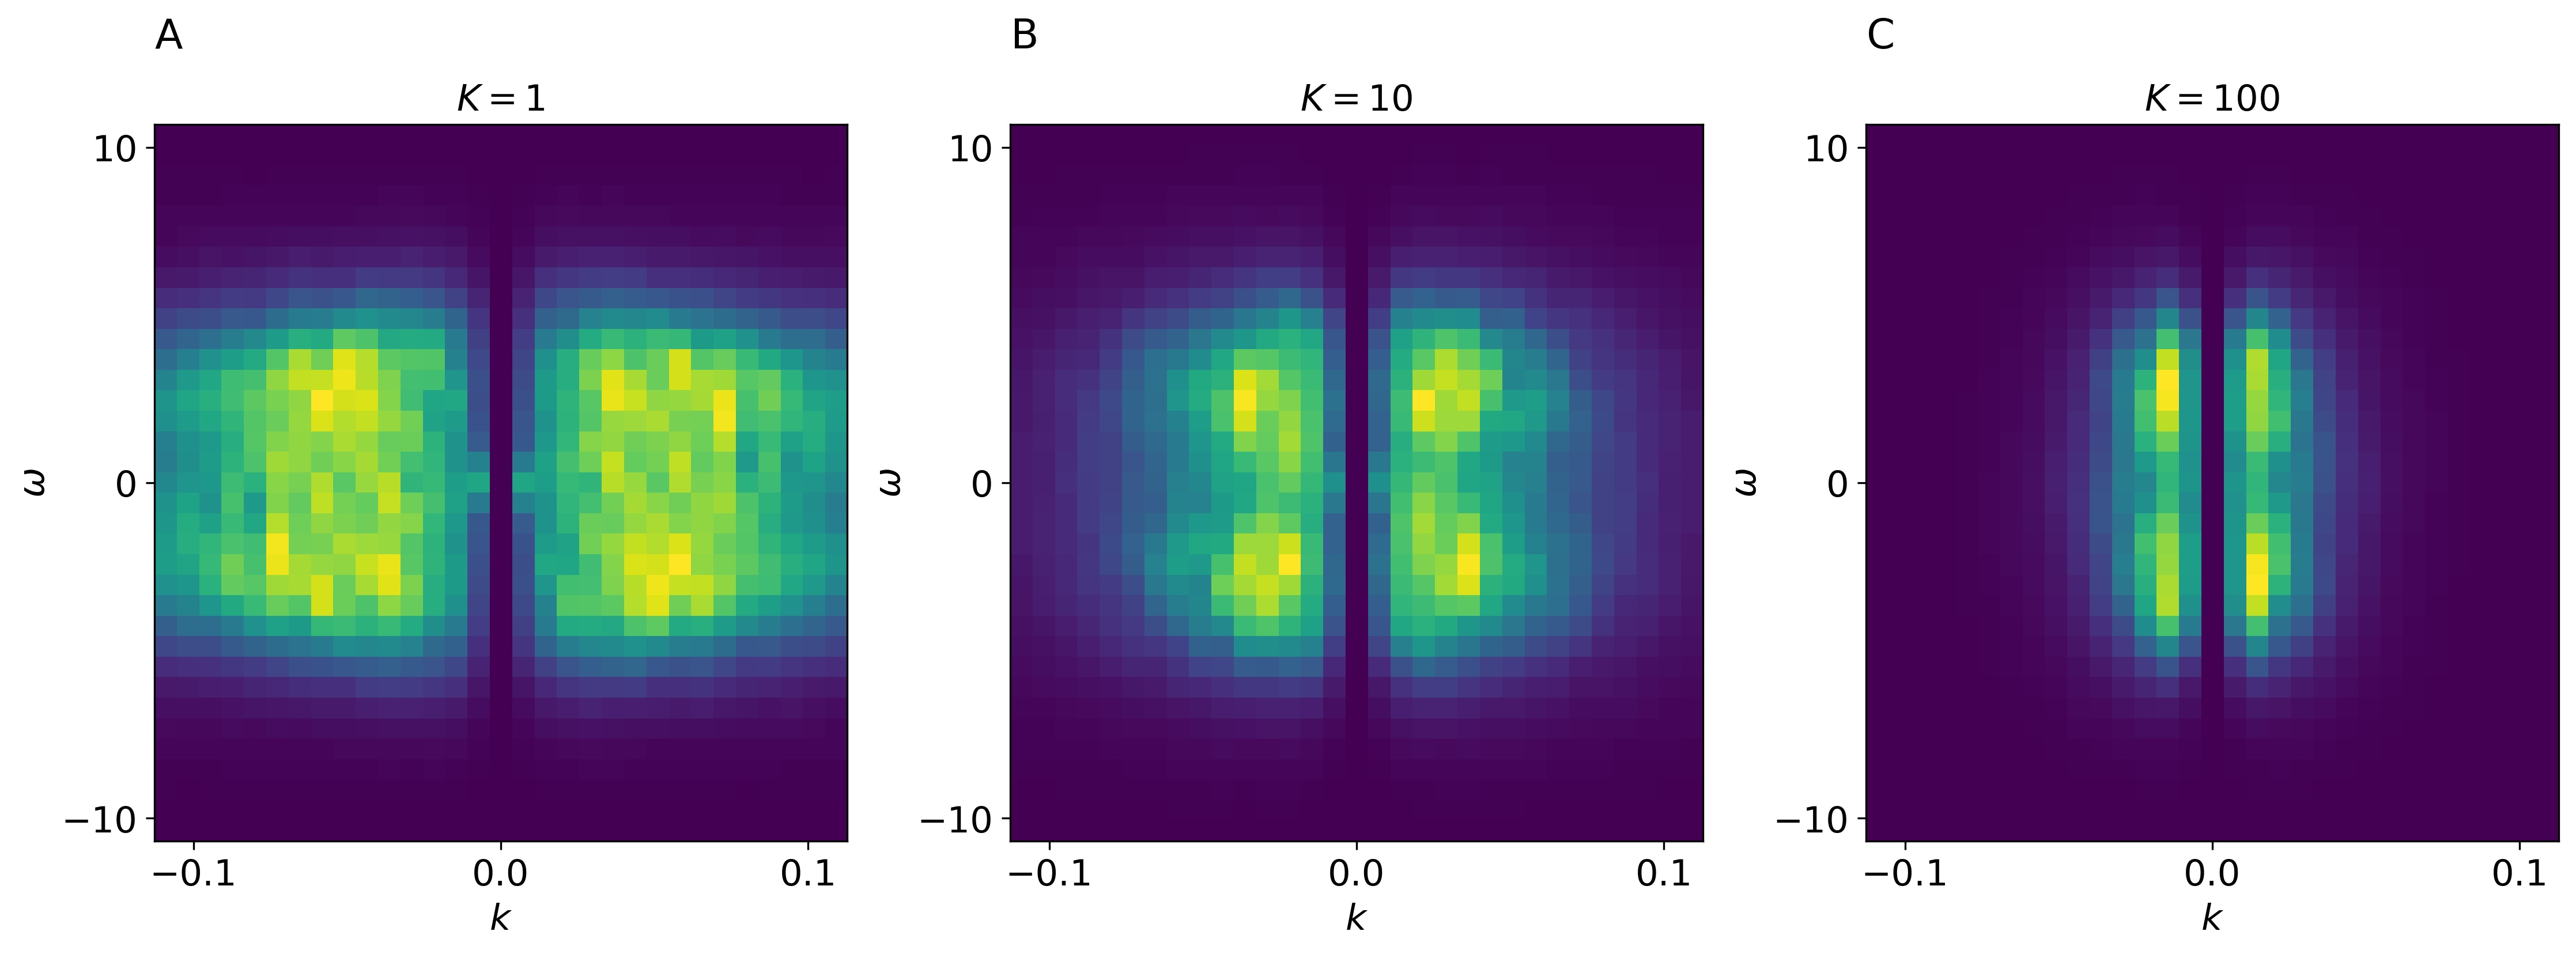

In [3]:
import matplotlib.gridspec as gridspec
import os 

## FIXED PARAMETERS:
NSteps= 20_000_000
NSave=1000
dt=0.001
DT=NSave*dt
DX=1
Nx=1024
Ny=1024
# alp=-1.00
# gGrav = 0.10
# aPhi=-5.0

fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=300)


for ii, KQ in enumerate([0.15, 1.50, 15.00]):
    ax =axes[ii]
    
    outputDir='heightFieldData/Nx_1024_Ny_1024_dt_0.001_KQ_'+"{:0.2f}".format(KQ)+'/alpha_-1.00_seed_1'

    hTX = np.load(os.path.join(outputDir, 'hField.npy')) #h(t,x)
    hTX = np.array(hTX)
    hTX_clipped= hTX #If we want to ignore the initial transient -- not necessary in the long simulations

    ##########

    m_total = NSteps/NSave
    m_interval = 100

    hWK_total = np.zeros([m_interval,Nx])

    wkais=np.zeros([m_interval,Nx])
    wkais1=kaiser(m_interval,10) 
    for i in range(Nx):
        wkais[:,i]=wkais1


    for i in range(int(m_total/m_interval)):
        h_interval=hTX_clipped[m_interval*i:m_interval*(i+1),:]
        h_interval=h_interval-np.mean(np.mean(h_interval))
        h_interval=h_interval*wkais
        hWK_interval=np.abs(fftshift(fft2(h_interval)))**2
        hWK_total=hWK_total+hWK_interval


    hWK_total = hWK_total/(i+1)

    hWK_norm = np.copy(hWK_total)
    for i in range(Nx):
        hWK_norm[:, i] = hWK_norm[:, i]/np.max(hWK_norm[:, i])


    k_len=31
    w_len=35
    dK = 2*np.pi/(Nx*DX) *np.sqrt(1.5) ##PHYSICAL UNITS -- convert from simulation units of length, time and stress to those defined in the mansucript
    dW = 2*np.pi/(m_interval*DT)  *10
    
    
    w_min, w_max = -dW*(w_len//2), dW*(w_len//2)
    k_min, k_max= -dK*(k_len//2), dK*(k_len//2)

    hWK_zoomed_total = hWK_total[m_interval//2 -w_len//2:m_interval//2 +w_len//2+1, Nx//2-k_len//2:Nx//2+k_len//2+1]

    ax.imshow(hWK_zoomed_total, origin='lower', extent=[k_min, k_max, w_min, w_max], aspect='auto')
            
    ax.tick_params(axis='both', which='major', labelsize=15)
    
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=4, axis='y')
    ax.set_ylabel(r'$\omega$', fontsize=15)
    ax.set_xlabel(r'$k$', fontsize=15)

fig.tight_layout()

axes[0].set_title(r'$K = 1$', fontsize=15)
axes[1].set_title(r'$K = 10$', fontsize=15)
axes[2].set_title(r'$K = 100$', fontsize=15)

axes[0].text(-0.0, 1.15, r'$\rm{A}$', ha='left', va='top', transform=axes[0].transAxes, fontsize=17)
axes[1].text(-0.0, 1.15, r'$\rm{B}$', ha='left', va='top', transform=axes[1].transAxes, fontsize=17)
axes[2].text(-0.0, 1.15, r'$\rm{C}$', ha='left', va='top', transform=axes[2].transAxes, fontsize=17)

plt.show()